# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [211]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [212]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [213]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

Text(0, 0.5, 'Bénéfice x1000')

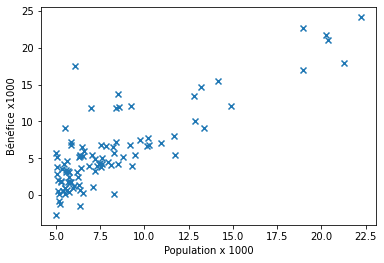

In [214]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')


# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [215]:
def computeCostNonVect(X, y, theta):
    sum = 0
    for i in range(X.shape[0]):
        pred = 0
        for j in range(X.shape[1]):
            pred += theta[j][0]*X[i][j]
        sum += (pred - y[i])**2
    
    return sum / (2*len(y))


In [216]:
def computeCost(X, y, theta):
    pred = X.dot(theta)[:,0]
    diff = np.subtract(pred, y)
    return  np.sum(np.square(diff)) / (2*len(y))


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [217]:
def gradientDescent(X, y, theta, alpha, iterations):

    cost_trace = np.zeros(iterations)
    theta_trace = np.zeros((theta.shape[0],iterations))
    for i in range(iterations):
        pred = np.dot(X,theta)[:,0]
        #la transpose de X multiplie par la difference entre la prediction et Y nous donne directement la somme.
        theta = (theta[:,0] - (1/len(y)) * alpha * np.dot(X.T, np.subtract(pred,y))) [:,None] # [:,None] pour garder le shape (n,1)
        cost_trace[i] = computeCost(X, y, theta)
        theta_trace[:,i] = theta[:,0]

    return theta , cost_trace, theta_trace


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [218]:
theta = np.zeros((2, 1))


Calculer le cout initial

In [219]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [220]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta, cost_trace, theta_trace  = gradientDescent(X, y, theta, alpha, iterations)


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

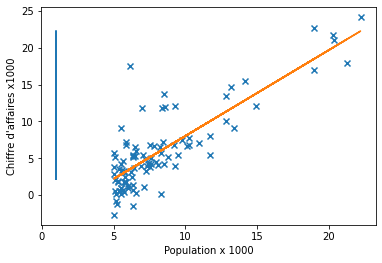

In [221]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

Text(0.5, 0, 'Cost')

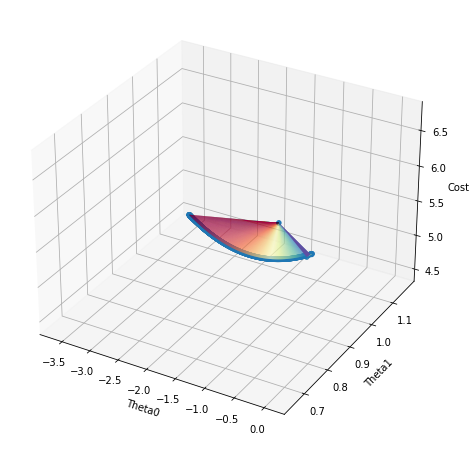

In [222]:
theta0 = theta_trace[0,:]
theta1 = theta_trace[1,:]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta0, theta1, cost_trace)
ax.plot_trisurf(theta0, theta1, cost_trace, cmap=plt.cm.Spectral)
ax.set_ylabel('Theta1')
ax.set_xlabel('Theta0')
ax.set_zlabel('Cost')



Prédire des valeurs de y

In [223]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([0.45197679])

In [224]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.53424501])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [225]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [226]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X_multi=np.column_stack((intercept,dataMulti[:,0:2]))
y_multi = dataMulti[:, 2]

In [227]:
# redéfinissez vos fonctions de coût si cela est necessaire


Standardisation des données en moyenne = 0

In [228]:

X_std = np.column_stack((intercept,dataMulti[:,0:2]))
for i in range(1,X_multi.shape[1]):
    mean = np.mean(X_std[:,i])
    std_dev= np.std(X_std[:,i])
    X_std [:,i] = [(X_std[j,i] - mean) / std_dev for j in range (X_std.shape[0])]    

Appliquer la descente du gradient à plusieurs variables

---Theta sans standardisation---: 
[[nan]
 [nan]
 [nan]]
CPU times: user 73.5 ms, sys: 17.7 ms, total: 91.2 ms
Wall time: 78.6 ms


<ipython-input-216-2e1c138a0fe0>:4: RuntimeWarning: overflow encountered in square
  return  np.sum(np.square(diff)) / (2*len(y))
<ipython-input-217-646ae87c8ea0>:8: RuntimeWarning: invalid value encountered in subtract
  theta = (theta[:,0] - (1/len(y)) * alpha * np.dot(X.T, np.subtract(pred,y))) [:,None] # [:,None] pour garder le shape (n,1)


Text(0.5, 0.92, 'Prix par rapport a la superficie et le nombre de chambre (Sans standardisation)')

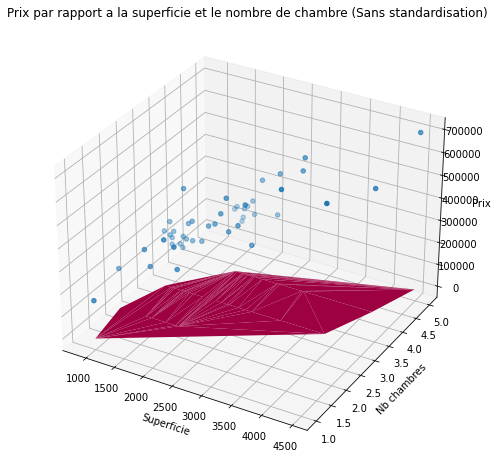

In [229]:
%%time
#Sans standardisation
theta = np.zeros((3, 1))
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta= gradientDescent(X_multi, y_multi, theta, alpha, iterations)[0]

print(f'---Theta sans standardisation---: \n{theta}')
theta = np.nan_to_num(theta)
price = X_multi.dot(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_multi[:,1], X_multi[:,2], y_multi)
ax.plot_trisurf(X_multi[:,1], X_multi[:,2], price[:,0], cmap=plt.cm.Spectral)
ax.set_ylabel('Nb chambres')
ax.set_xlabel('Superficie')
ax.set_zlabel('Prix')
ax.set_title('Prix par rapport a la superficie et le nombre de chambre (Sans standardisation)')


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

---Theta avec standardisation---: 
[[340412.66939734]
 [109370.02582704]
 [ -6500.53710423]]
CPU times: user 94.4 ms, sys: 3.66 ms, total: 98.1 ms
Wall time: 79.1 ms


Text(0.5, 0.92, 'Prix par rapport a la superficie et le nombre de chambre (Avec standardisation)')

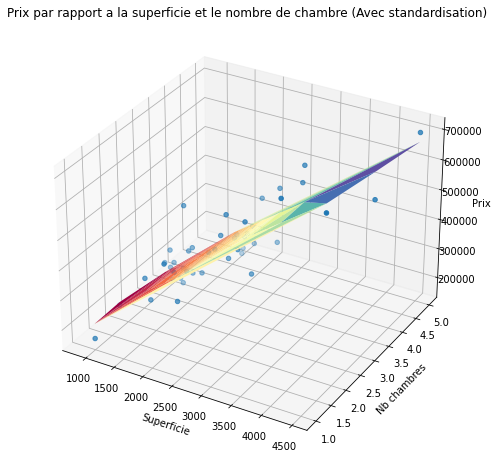

In [230]:
%%time
#Sans standardisation
theta = np.zeros((3, 1))
# paramètres
iterations = 1500
alpha = 0.01
# Appel
theta= gradientDescent(X_std, y_multi, theta, alpha, iterations)[0]
print(f'---Theta avec standardisation---: \n{theta}')
price = X_std.dot(theta)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_multi[:,1], X_multi[:,2], y_multi)
ax.plot_trisurf(X_multi[:,1], X_multi[:,2], price[:,0], cmap=plt.cm.Spectral)
ax.set_ylabel('Nb chambres')
ax.set_xlabel('Superficie')
ax.set_zlabel('Prix')
ax.set_title('Prix par rapport a la superficie et le nombre de chambre (Avec standardisation)')




On remarque que sans la standardisation, la descente du gradient nous donne nan.

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [231]:
from sklearn.linear_model import LinearRegression
import random

In [279]:
c =random.randint(0,X.shape[0])

reg = LinearRegression()
reg.fit(X, y)


theta = gradientDescent(X, y, np.ones((2,1)), alpha, iterations=1500)[0]
print('-----Premiere partie (un seule caracteristique)-----')
print(f'Prediction de sklearn: {float(reg.predict(X[c,:][None, :]))}')
print(f'Prediction de note implementation: {float(np.matmul(X[c,:][None, :],theta))}')
print(f'Valeur reele: {y[c]}')





-----Premiere partie (un seule caracteristique)-----
Prediction de sklearn: 4.961181592787268
Prediction de note implementation: 5.043783147359488
Valeur reele: 4.2885


In [267]:
c =random.randint(0,X_multi.shape[0])

reg = LinearRegression()
reg.fit(X_std, y_multi)


theta = gradientDescent(X_std, y_multi, np.ones((3,1)), alpha, iterations=1500)[0]
print('-----Deuxieme partie (un seule caracteristique)-----')
print(f'Prediction de sklearn: {float(reg.predict(X_std[c,:][None, :]))}')
print(f'Prediction de note implementation: {float(np.matmul(X_std[c,:][None, :],theta))}')
print(f'Valeur reele: {y_multi[c]}')





-----Deuxieme partie (un seule caracteristique)-----
Prediction de sklearn: 415030.08282720065
Prediction de note implementation: 414960.4662978864
Valeur reele: 469000.0


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance